In [1]:
from keras.datasets import mnist

Using TensorFlow backend.
/Users/alicevnix/anaconda3/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


### Neural Networks 

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


In [3]:
train_images.shape


(60000, 28, 28)

In [4]:
len(train_labels)

60000

In [5]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
test_images.shape

(10000, 28, 28)

In [7]:
len(test_labels)

10000

In [8]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [9]:
from keras import models
from keras import layers
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))


In [11]:
network.compile(optimizer='rmsprop',
                loss = 'categorical_crossentropy',
                metrics=['accuracy'])


In [12]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255


In [13]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [14]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)


Epoch 1/5
60000/60000 [==============================] - 7s - loss: 0.2520 - acc: 0.9278     
Epoch 2/5
60000/60000 [==============================] - 6s - loss: 0.1029 - acc: 0.9697     
Epoch 3/5
60000/60000 [==============================] - 6s - loss: 0.0679 - acc: 0.9799     
Epoch 4/5
60000/60000 [==============================] - 6s - loss: 0.0495 - acc: 0.9851     
Epoch 5/5
60000/60000 [==============================] - 6s - loss: 0.0376 - acc: 0.9887     


In [15]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)


 9824/10000 [============================>.] - ETA: 0stest_acc: 0.9781


In [5]:
print (train_images.ndim)


3


In [6]:
print(train_images.shape)

(60000, 28, 28)


In [7]:
print(train_images.dtype)

uint8


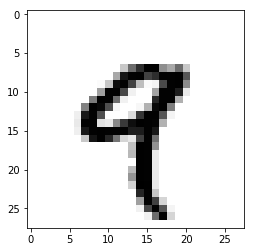

In [8]:
digit = train_images[4]

import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()


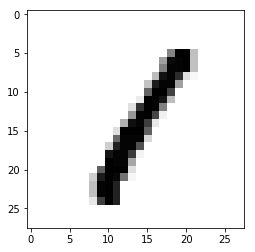

In [9]:
digit = train_images[3]

import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()


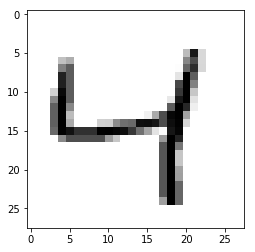

In [10]:
digit = train_images[2]

import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()


In [1]:
# Binary classification example

from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)


Using TensorFlow backend.
/Users/alicevnix/anaconda3/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [25]:
train_data[0]


[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [26]:
train_labels[0]


1

In [13]:
# Must convert integers to tensors before feeding it into the neural network


In [4]:
import numpy as np 

# Create an all-zero matrix of shape(len(sequences), dimension)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences): 
        results[i, sequence] = 1. # Seet specific indices of results[i] to 1s
    return results
x_train = vectorize_sequences(train_data) # Vectorized training data
x_test = vectorize_sequences(test_data)  # Vectorized test data


In [28]:
# Here is what the sample looks like now after writing out the function above

x_train[0]


array([ 0.,  1.,  1., ...,  0.,  0.,  0.])

In [5]:
# For consistency we will vectorize our labels 

y_train = np.asarray (train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')


In [12]:
# Now, after preparing the data, it is ready to go into a neural network

In [30]:
# Building the architecture for the neural network

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))



In [7]:
# Stating your loss () and optimizer as well as metric used to evaluate the model
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])


In [26]:
# Configuring the optimizer
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001), 
             loss='binary_crossentropy',
             metrics=['accuracy'])


In [27]:
# Using custom losses and metrics 
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss=losses.binary_crossentropy,
             metrics=[metrics.binary_accuracy])


In [8]:
# Creating a validation set consisting of 10000 samples from the original training data

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]



In [33]:
# training your model

model.compile(optimizer='rmsprop', 
             loss='binary_crossentropy',
             metrics=['acc'])

history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))


Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 5s - loss: 0.5157 - acc: 0.7895 - val_loss: 0.4009 - val_acc: 0.86530.7
Epoch 2/20
15000/15000 [==============================] - 4s - loss: 0.3146 - acc: 0.9029 - val_loss: 0.3247 - val_acc: 0.8787
Epoch 3/20
15000/15000 [==============================] - 4s - loss: 0.2319 - acc: 0.9246 - val_loss: 0.2808 - val_acc: 0.8923
Epoch 4/20
15000/15000 [==============================] - 3s - loss: 0.1816 - acc: 0.9429 - val_loss: 0.2729 - val_acc: 0.8905
Epoch 5/20
15000/15000 [==============================] - 2s - loss: 0.1495 - acc: 0.9513 - val_loss: 0.2780 - val_acc: 0.8891
Epoch 6/20
15000/15000 [==============================] - 2s - loss: 0.1209 - acc: 0.9631 - val_loss: 0.3220 - val_acc: 0.8806
Epoch 7/20
15000/15000 [==============================] - 2s - loss: 0.1031 - acc: 0.9691 - val_loss: 0.3045 - val_acc: 0.8849
Epoch 8/20
15000/15000 [==============================] - 

In [34]:
history_dict = history.history
history_dict.keys()


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [35]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']



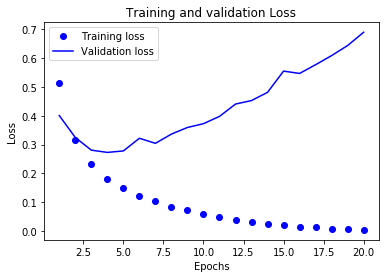

In [36]:
epochs = range(1, len(acc) + 1)


plt.plot(epochs, loss_values, 'bo', label='Training loss') #"bo" is for blue dot
plt.plot(epochs, val_loss_values, 'b', label='Validation loss') # "b" is for solid blue line
plt.title('Training and validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [37]:
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']



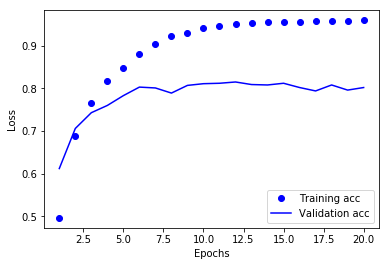

In [38]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b',label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [39]:
# Retraining a model from scratch with less epochs in order to adjust for the previous over-fitting

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', 
             loss='binary_crossentropy',
             metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)



Epoch 1/4
25000/25000 [==============================] - 5s - loss: 0.4719 - acc: 0.8105     
Epoch 2/4
25000/25000 [==============================] - 3s - loss: 0.2652 - acc: 0.9078     
Epoch 3/4
25000/25000 [==============================] - 3s - loss: 0.2021 - acc: 0.9278     
Epoch 4/4
24896/25000 [============================>.] - ETA: 0s

In [40]:
results

[0.29108694486618042, 0.88480000000000003]

In [41]:
model.predict(x_test)


array([[ 0.92163539],
       [ 0.83395797],
       [ 0.99947542],
       ..., 
       [ 0.43970042],
       [ 0.00360955],
       [ 0.81310362]], dtype=float32)

### Multiclass Classification 

In [3]:
# Multi-class classification problem 

from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)




2056192/2110848 [============================>.] - ETA: 0s

In [4]:
len(train_data)


8982

In [5]:
len(test_data)


2246

In [6]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [7]:
train_labels[10]


3

In [8]:
# Preparing the data 

import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


In [10]:
# One-hot encoding for labels - categorical data

def to_one_hotness(labels, dimension=46):
    answer = np.zeros((len(labels), dimension))
    for i, label in enumerate (labels):
        answer[i, label] = 1.
    return answer

one_hot_train_labels = to_one_hotness(train_labels)
one_hot_test_labels = to_one_hotness(test_labels)



In [11]:
# Building your network

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))



In [13]:
# Compiling the model

model.compile(optimizer='rmsprop', 
             loss='categorical_crossentropy',
             metrics=['accuracy'])


In [14]:
# Creating validation set by setting apart 1,000 samples from the training data

x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]


In [15]:
# Training the model using model.fit ()

history =model.fit(partial_x_train, partial_y_train, epochs = 20, batch_size=512, validation_data=(x_val, y_val))

                  

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 3s - loss: 2.5306 - acc: 0.4962 - val_loss: 1.7180 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 1s - loss: 1.4430 - acc: 0.6878 - val_loss: 1.3435 - val_acc: 0.7060
Epoch 3/20
7982/7982 [==============================] - 1s - loss: 1.0929 - acc: 0.7661 - val_loss: 1.1704 - val_acc: 0.7430
Epoch 4/20
7982/7982 [==============================] - 1s - loss: 0.8682 - acc: 0.8166 - val_loss: 1.0788 - val_acc: 0.7600
Epoch 5/20
7982/7982 [==============================] - 1s - loss: 0.7020 - acc: 0.8483 - val_loss: 0.9844 - val_acc: 0.7830
Epoch 6/20
7982/7982 [==============================] - 1s - loss: 0.5666 - acc: 0.8796 - val_loss: 0.9401 - val_acc: 0.8030
Epoch 7/20
7982/7982 [==============================] - 1s - loss: 0.4592 - acc: 0.9039 - val_loss: 0.9090 - val_acc: 0.8010
Epoch 8/20
7982/7982 [==============================] - 1s - loss: 0.3704 - a

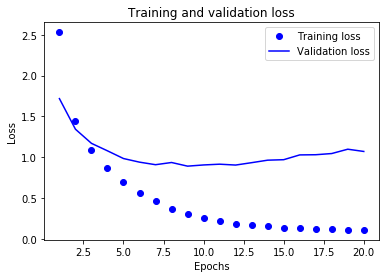

In [16]:
# Visualization for loss and accuracy curves

import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


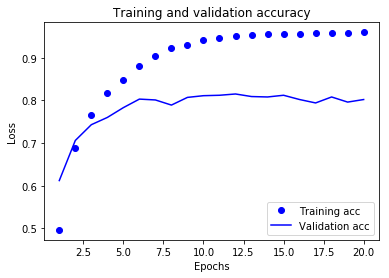

In [18]:
acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [19]:
# Above we can see that the network begins to overfit around 9 epochs

In [20]:
# Retrain the model from scratch - build a new neural network with less epochs = 9 instead of 20

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)


Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 2s - loss: 2.5401 - acc: 0.5226 - val_loss: 1.6792 - val_acc: 0.6540
Epoch 2/9
7982/7982 [==============================] - 1s - loss: 1.3785 - acc: 0.7096 - val_loss: 1.2825 - val_acc: 0.7210
Epoch 3/9
7982/7982 [==============================] - 1s - loss: 1.0207 - acc: 0.7781 - val_loss: 1.1321 - val_acc: 0.7550
Epoch 4/9
7982/7982 [==============================] - 1s - loss: 0.8003 - acc: 0.8257 - val_loss: 1.0532 - val_acc: 0.7580
Epoch 5/9
7982/7982 [==============================] - 1s - loss: 0.6392 - acc: 0.8629 - val_loss: 0.9753 - val_acc: 0.7950
Epoch 6/9
7982/7982 [==============================] - 1s - loss: 0.5112 - acc: 0.8930 - val_loss: 0.9097 - val_acc: 0.8130
Epoch 7/9
7982/7982 [==============================] - 1s - loss: 0.4115 - acc: 0.9141 - val_loss: 0.8913 - val_acc: 0.8240
Epoch 8/9
7982/7982 [==============================] - 1s - loss: 0.3357 - acc: 0.92

In [22]:
# Left side shows the loss, right side shows the accuracy

results

[1.0225298075620766, 0.77738201251968353]

Answer:  We reach an accuracy of ~78%

In [23]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)


0.182546749777382

In [3]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation='sigmoid'))



In [2]:
# Replace it with a smaller network to see how it performs

model = models.Sequential()
model.add(layers.Dense(4, activation = 'relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation = 'relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [6]:
# Build a network with greater capacity

model = models.Sequential()
model.add(layers.Dense(512, activation = 'relu', input_shape=(10000,)))
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [8]:
# Adding regularization to the parameter weights

from keras import regularizers



In [6]:
# Applying the regularization technique - Dropout

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
        

In [1]:
# Convolutional Neural Networks or convnets using CV

from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32,  (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64,  (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64,  (3, 3), activation='relu'))



Using TensorFlow backend.
/Users/alicevnix/anaconda3/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [3]:
# Architecture of CNN

model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [4]:
# Adding a classifier on top of the convnet - using the last layer

model.add(layers.Flatten()) # Flatten 3D outputs to 1D
model.add(layers.Dense(64,  activation='relu'))
model.add(layers.Dense(10,  activation='softmax'))


In [5]:
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                36928     
__________

In [7]:
# MNIST example using convnets 

from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


In [8]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


In [9]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [10]:
model.fit(train_images, train_labels, epochs=5, batch_size=64)


Epoch 1/5
60000/60000 [==============================] - 67s - loss: 0.1701 - acc: 0.9470    
Epoch 2/5
60000/60000 [==============================] - 66s - loss: 0.0452 - acc: 0.9863    
Epoch 3/5
60000/60000 [==============================] - 66s - loss: 0.0318 - acc: 0.9902    
Epoch 4/5
60000/60000 [==============================] - 66s - loss: 0.0236 - acc: 0.9929    
Epoch 5/5
60000/60000 [==============================] - 66s - loss: 0.0186 - acc: 0.9941    


In [11]:
test_loss, test_acc = model.evaluate(test_images, test_labels)


 9888/10000 [============================>.] - ETA: 0s

In [12]:
test_acc

0.99209999999999998

We achieve a much higher accuracy with the simple convnet compared to the densely connected neural network seen before.

### Computer Vision (CV) Binary Classification Problem

In [64]:

import os, shutil

In [65]:
# The path to the directory where the original
# dataset was uncompressed
original_dataset_dir = '/Users/alicevnix/Desktop/kaggle_data.jpg/train'

# The directory where we will
# store our smaller dataset
base_dir = '/Users/alicevnix/Desktop/cats_dogs'
shutil.rmtree(base_dir)
os.mkdir(base_dir)

# Directories for our training,
# validation and test splits
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

# Directory with our validation cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

# Directory with our validation dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

# Copy first 1000 cat images to train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# Copy next 500 cat images to validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 cat images to test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy first 1000 dog images to train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to validation_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to test_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
    

In [66]:
# Let's count the number of images in each split

In [67]:
print('total training cat images:', len(os.listdir(train_cats_dir)))


total training cat images: 1000


In [68]:
print('total training dog images:', len(os.listdir(train_dogs_dir)))


total training dog images: 1000


In [69]:
print('total validation cat images:', len(os.listdir(validation_cats_dir)))

total validation cat images: 500


In [70]:
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

total validation dog images: 500


In [71]:
print('total test cat images:', len(os.listdir(test_cats_dir)))

total test cat images: 500


In [72]:
 print('total test dog images:', len(os.listdir(test_dogs_dir)))


total test dog images: 500


We have a balanced binary classification problem: each split contains the same number of samples.  Therefore, accuracy score is a valid metric to use.

In [8]:
# Building your network - Architecture

from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))



Using TensorFlow backend.
/Users/alicevnix/anaconda3/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [10]:
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [11]:
# Compilation step

from keras import optimizers

model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=1e-4),
 metrics=['acc'])
    

### Data Preprocessing step

1.Read the picture files.
2.Decode the JPEG content to RGB grids of pixels.
3.Convert these into floating-point tensors.
4.Rescale the pixel values (between 0 and 255) to the [0, 1] interval (as you know, neural networks prefer to deal with small input values).


In [73]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


In [74]:
train_generator = train_datagen.flow_from_directory(train_dir,
    target_size=(150, 150),
    batch_size= 20,
    class_mode='binary')


Found 2000 images belonging to 2 classes.


In [75]:
validation_generator = test_datagen.flow_from_directory(validation_dir,
    target_size = (150, 150),
    batch_size=20,
    class_mode = 'binary')


Found 1000 images belonging to 2 classes.


In [76]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break
    

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


### Fitting the Model From Scratch

In [ ]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)


In [ ]:
# Save your model

model.save('cats_and_dogs_small_1.h5')


In [ ]:
# Let’s plot the loss and accuracy of the model over the training and validation data

# loss and accuracy during training

import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


These plots are characteristic of overfitting. The training accuracy increases linearly over time, until it reaches nearly 100%, whereas the validation accuracy stalls at 70–72%. The validation loss reaches its minimum after only five epochs and then stalls, whereas the training loss keeps decreasing linearly until it reaches nearly 0.

In [18]:
# Data augmentation technique

datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')


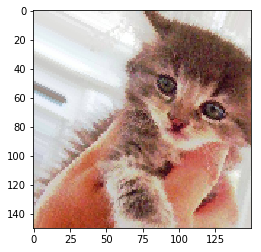

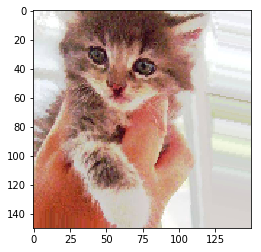

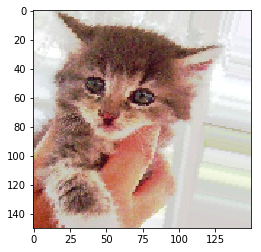

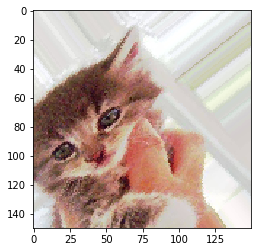

In [27]:
# Random augmented training images

from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
img_path = fnames[3]

img = image.load_img(img_path, target_size=(150, 150))

x = image.img_to_array(img)

x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()


In [20]:
mg_path = '/Users/alicevnix/Desktop/cats_dogs/test/cats/cat.1700.jpg'

from keras.preprocessing import image
import numpy as np

img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

print(img_tensor.shape)



(1, 150, 150, 3)


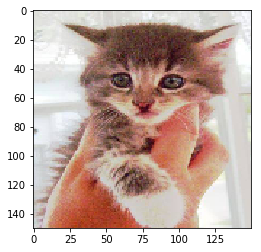

In [39]:
import matplotlib.pyplot as plt

plt.imshow(img_tensor[0])
plt.show()


### Regularization Techniques - Dropout and Augmentation

In [24]:
# Retraining the model this time including regularization - Dropout

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])


In [25]:
# Data augmentation and Dropout included in the model - to reduce overfitting

In [26]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
target_size=(150, 150),
batch_size=32,
class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')


history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)



Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 251s - loss: 0.6950 - acc: 0.5134 - val_loss: 0.6969 - val_acc: 0.4968
Epoch 2/100
100/100 [==============================] - 242s - loss: 0.6876 - acc: 0.5481 - val_loss: 0.6738 - val_acc: 0.5329
Epoch 3/100
100/100 [==============================] - 247s - loss: 0.6741 - acc: 0.5787 - val_loss: 0.7010 - val_acc: 0.5116
Epoch 4/100
100/100 [==============================] - 240s - loss: 0.6607 - acc: 0.6072 - val_loss: 0.6266 - val_acc: 0.6469
Epoch 5/100
100/100 [==============================] - 235s - loss: 0.6413 - acc: 0.6297 - val_loss: 0.5966 - val_acc: 0.6798
Epoch 6/100
100/100 [==============================] - 234s - loss: 0.6317 - acc: 0.6378 - val_loss: 0.6253 - val_acc: 0.6352
Epoch 7/100
100/100 [==============================] - 235s - loss: 0.6170 - acc: 0.6485 - val_loss: 0.5838 - val_acc: 0.6929
Epoch 8/100
100/100 [=============

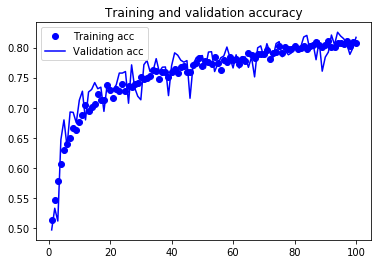

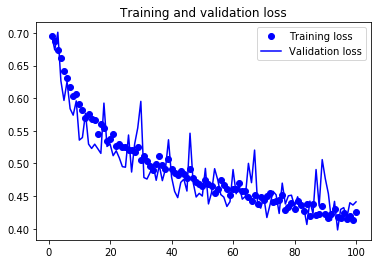

In [29]:
# Let’s plot the loss and accuracy of the model over the training and validation data

# loss and accuracy during training

import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


The plots above show a big improvement.  Because of using regularization techniques like dropout and augmentation, the training curves are closely tracking the validation curves - no longer overfitting.  We reach an accuracy close to 81%!  By tuning the network's parameters (number of filters per convolution layer, or number of layers in the network, may be able to achieve an even better accuracy, but probably not above 90%.  Likely need to use a pretrained model.

### Fitting the Data Using Pretrained Model

List of image classification pre-trained models to choose from:

1. Xception
2. Inception V3
3. ResNet50
4. VGG16
5. VGG19
6. MobileNet

This can help us with feature extraction - Use representations learned by a previous classifier and neural network and extract interesting features from new samples using this pre-trained model.  These features will be run through a new classifier, which is trained from scratch.

In [42]:
# Instantiating the VGG16 convolutional base

from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                 include_top=False,
                 input_shape=(150, 150, 3))



In [43]:
# Details of the architecture of the VGG16 convolutional base- similar to previous convnets seen previously

conv_base.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

Note - The final feature map has shape (4, 4, 512). That’s the feature on top of which you’ll stick a densely connected classifier.

### Feature Extraction with Data Augmentation

**Note** - This technique is so expensive that you should only attempt it if you have access to a GPU—it’s absolutely intractable on CPU. If you can’t run your code on GPU, then the previous technique is the way to go.

In [4]:
# Adding densely connected classifier on top of the convolutional base

#from keras import models
#from keras import layers
#model = models.Sequential()
#model.add(conv_base)
#model.add(layers.Flatten())
#model.add(layers.Dense(256, activation='relu'))
#model.add(layers.Dense(1, activation='sigmoid'))




In [ ]:
# In Keras, you freeze a network by setting its trainable attribute to False:

#print('This is the number of trainable weights '
         #'before freezing the conv base:', len(model.trainable_weights))
#This is the number of trainable weights before freezing the conv base: 30
#conv_base.trainable = False
#print('This is the number of trainable weights '
          #'after freezing the conv base:', len(model.trainable_weights))
#This is the number of trainable weights after freezing the conv base: 4

In [ ]:
# Training the model end to end with a frozen convolutional base - includes augmentation

from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

#train_datagen = ImageDataGenerator(
      #rescale=1./255,
      #rotation_range=40,
      #width_shift_range=0.2,
      #height_shift_range=0.2,
      #shear_range=0.2,
      #zoom_range=0.2,
      #horizontal_flip=True,
      #fill_mode='nearest')

#test_datagen = ImageDataGenerator(rescale=1./255)
#train_generator = train_datagen.flow_from_directory(
    #train_dir,
#target_size=(150, 150),
#batch_size=20,
#class_mode='binary')

#validation_generator = test_datagen.flow_from_directory(
        #validation_dir,
        #target_size=(150, 150),
        #batch_size=20,
        #class_mode='binary')

#model.compile(loss='binary_crossentropy',
              #optimizer=optimizers.RMSprop(lr=2e-5),
              #metrics=['acc'])

#history = model.fit_generator(
      #train_generator,
      #steps_per_epoch=100,
      #epochs=30,
      #validation_data=validation_generator,
      #validation_steps=50)


Next, you can fine-tune your model (unfreezing a few of the top layers of a frozen model base used for feature extraction, and jointly training both the newly added part of the model (fully connected classifier) and these top layers.  Steps to follow: 

1. Add your custom network on top of an already-trained base network
2. Freeze base network
3. Train the part you added
4. Unfreeze some layers in base network
5. Jointly train both these layers and the part you added


In [5]:
# Fine-tune only top two or three layers in the convolutional base

#conv_base.trainable = True
#set_trainable = False
#for layer in conv_base.layers:
    #if layer.name == 'block5_conv1':
        #set_trainable = True
    #if set_trainable:
        #layer.trainable = True
    #else:
        #layer.trainable = False
        

In [7]:
# Fine-tune and fit the model

 #model.compile(loss='binary_crossentropy',
                      #optimizer=optimizers.RMSprop(lr=1e-5),
                      #metrics=['acc'])
    
        #history = model.fit_generator(
              #train_generator,
              #steps_per_epoch=100,
              #epochs=100,
              #validation_data=validation_generator,
              #validation_steps=50)


In [8]:
# Smoothing the plots since they may contain a lot of noise

#def smooth_curve(points, factor=0.8):
  #smoothed_points = []
  #for point in points:
    #if smoothed_points:
      #previous = smoothed_points[-1]
      #smoothed_points.append(previous * factor + point * (1 - factor))
    #else:
      #smoothed_points.append(point)
  #return smoothed_points
#plt.plot(epochs,
         #smooth_curve(acc), 'bo', label='Smoothed training acc')
#plt.plot(epochs,
         #smooth_curve(val_acc), 'b', label='Smoothed validation acc')
#plt.title('Training and validation accuracy')
#plt.legend()
#plt.figure()
#plt.plot(epochs,
         #smooth_curve(loss), 'bo', label='Smoothed training loss')
#plt.plot(epochs,
         #smooth_curve(val_loss), 'b', label='Smoothed validation loss')
#plt.title('Training and validation loss')
#plt.legend()
#plt.show()


### Evaluating the Model on the Test Dataset

In [9]:
# Evaluate the model on the test data

#test_generator = test_datagen.flow_from_directory(
        #test_dir,
        #target_size=(150, 150),
        #batch_size=20,
        #class_mode='binary')
#test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
#print('test acc:', test_acc)
